In [1]:
import pandas as pd
import numpy as np

import  geopandas as gpd

import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)




In [2]:
chile_pol = gpd.read_file('../shape_chile/chile_pol_join_8_16.shp')
chile_pol.head(2)
# center = chile_pol["the_geom"].iloc[0].centroid()
# chile_pol.rotate(-90, origin=center).plot()

,select,id,codreg,codpro,codcom,nom_reg,nom_pro,nom_com,MacroZona,geometry
0,0,196,8,161,16109,Región del Biobío,Diguillín,Yungay,4,"MULTIPOLYGON (((71967.468 5733465.628, 71994.3..."
1,1,5,01,011,01101,Región de Tarapacá,Iquique,Iquique,1,"MULTIPOLYGON (((371195.093 7831251.588, 371198..."


In [3]:
data_ = pd.read_csv('../Vitamina_D_Visualizacion_26092022.csv', delimiter=';')
data_.head(5)

,FECHA_PETICION,Año,LABORATORIO,PETICION,IDENTIFICADOR,SEXO,ADULTO_NIÑO,MACROZONA,ESTACIONES_AÑO,EDAD,VITAMINA D,FOSFORO,CALCIO,CREATININA,COVID-19
0,02/01/2018 8:17,2018,SANTIAGO,1483128,"1,12E+13",M,Niño,CENTRO,VERANO,16,"22,87","5,5","10,9","0,9",NaN
1,02/01/2018 8:18,2018,SANTIAGO,1483181,"1,13E+13",F,Adulto,CENTRO,VERANO,33,"15,04",NaN,NaN,NaN,NaN
2,02/01/2018 8:24,2018,SANTIAGO,1483186,"1,11E+13",M,Adulto,CENTRO,VERANO,45,"17,17","4,1","9,6","0,8",NaN
3,02/01/2018 8:32,2018,SANTIAGO,1483328,"1,20E+12",F,Adulto,CENTRO,VERANO,52,"14,44","4,3","9,6","0,6",NaN
4,02/01/2018 8:33,2018,LA SERENA,1483344,"1,19E+12",F,Adulto,NORTE,VERANO,52,"15,52",NaN,NaN,"0,66",NaN


In [4]:
data_.LABORATORIO.unique()

array([' SANTIAGO', ' LA SERENA', ' VALDIVIA', ' ANTOFAGASTA',
       ' PUERTO MONTT', ' ILLAPEL', ' RANCAGUA', ' CONCEPCION', ' OVALLE',
       ' LOS ANDES', ' VIÑA DEL MAR', ' VALLENAR', ' TEMUCO', ' COPIAPO',
       ' ARICA', ' CALAMA', ' IQUIQUE', 'TALCA'], dtype=object)

In [5]:
nombres = {
   ' SANTIAGO': 'Región Metropolitana de Santiago',
   ' LA SERENA':'Región de Coquimbo',
   ' VALDIVIA': 'Región de Los Ríos',
   ' ANTOFAGASTA': 'Región de Antofagasta',
   ' PUERTO MONTT': 'Región de Los Lagos',
   ' ILLAPEL':'Región de Coquimbo',
   ' RANCAGUA':"Región del Libertador General Bernardo O'Higgins",
   ' CONCEPCION': 'Región del Biobío',
   ' OVALLE':'Región de Coquimbo',
   ' LOS ANDES': 'Región de Valparaíso',
   ' VIÑA DEL MAR':'Región de Valparaíso',
   ' VALLENAR':'Región de Atacama',
   ' TEMUCO':'Región de La Araucanía',
   ' COPIAPO':'Región de Atacama',
   ' ARICA':'Región de Arica y Parinacota',
   ' CALAMA':'Región de Antofagasta', 
   ' IQUIQUE':'Región de Tarapacá',
   'TALCA': 'Región del Maule'
}
codigos = {
   ' SANTIAGO': 13,
   ' LA SERENA':4,
   ' VALDIVIA': 14,
   ' ANTOFAGASTA': 2,
   ' PUERTO MONTT': 10,
   ' ILLAPEL':4,
   ' RANCAGUA':6,
   ' CONCEPCION': 8,
   ' OVALLE':4,
   ' LOS ANDES': 5,
   ' VIÑA DEL MAR':5,
   ' VALLENAR':3,
   ' TEMUCO':9,
   ' COPIAPO':3,
   ' ARICA':15,
   ' CALAMA':2, 
   ' IQUIQUE':1,
   'TALCA': 7
}



In [6]:
data_['nom_reg'] = data_.LABORATORIO.map(lambda x: nombres.get(x))
data_['cod_reg'] = data_.LABORATORIO.map(lambda x: codigos.get(x))

In [7]:
center = chile_pol["geometry"].iloc[0].centroid
chile_pol.geometry = chile_pol.rotate(96, origin=center)
chile_pol['centroide'] = chile_pol.geometry.centroid
chile_pol['X']= chile_pol.centroide.x
chile_pol['Y']= chile_pol.centroide.y

In [8]:
color=['#C62828', '#C62828', '#283593', '#FF9800', '#283593', '#C62828', '#283593',]

chile_pol['color'] = chile_pol.MacroZona.map(lambda x: color[x-1])

In [9]:
chile_pol.codreg=chile_pol.codreg.astype(int)
index_=[15,1,2,3,4,5,13,6,7,8,9,14,10]
chile_pol.head(2)

,select,id,codreg,codpro,codcom,nom_reg,nom_pro,nom_com,MacroZona,geometry,centroide,X,Y,color
0,0,196,8,161,16109,Región del Biobío,Diguillín,Yungay,4,"MULTIPOLYGON (((370389.032 5754191.517, 370382...",POINT (211847.414 5878178.564),2.118474e+05,5.878179e+06,#FF9800
1,1,5,1,011,01101,Región de Tarapacá,Iquique,Iquique,1,"MULTIPOLYGON (((-1747182.840 5832501.598, -174...",POINT (-1690337.413 5926709.736),-1.690337e+06,5.926710e+06,#C62828


In [10]:
## Macrozona:
## 3 (norte) hasta coquimbo
## Valparaiso - Rancagua Centro
## Sur de Maule PTO Montt
#  

In [11]:
chile_pol.MacroZona

0     4
1     1
2     1
3     1
4     2
5     2
6     4
7     4
8     5
9     5
10    6
11    6
12    3
13    5
14    1
Name: MacroZona, dtype: int64

In [12]:
index_

[15, 1, 2, 3, 4, 5, 13, 6, 7, 8, 9, 14, 10]

In [13]:
data_['VITAMINA D'] = data_['VITAMINA D'].map(lambda x: float(x.replace(',','.')))

In [14]:
data__ = data_.pivot_table(index='nom_reg',columns='Año', values='VITAMINA D', aggfunc={'VITAMINA D':np.mean}).reset_index().set_index('nom_reg')
data__ = pd.merge(data__, chile_pol[['nom_reg','codreg','X']], how='left', left_on='nom_reg', right_on='nom_reg')
# data__ = data__.loc[index_,:]
# data__

In [15]:
data__

,nom_reg,2018,2019,2020,2021,codreg,X
0,Región Metropolitana de Santiago,21.165394,23.952148,22.331422,20.970218,13,-2.026330e+05
1,Región de Antofagasta,21.371263,23.512016,23.639528,20.656813,2,-1.328599e+06
2,Región de Arica y Parinacota,23.444603,25.524146,23.285820,20.840833,15,-1.876573e+06
3,Región de Atacama,21.002618,23.927678,22.627952,19.958199,3,-8.949637e+05
4,Región de Coquimbo,21.332613,24.186933,22.366996,20.061693,4,-5.292458e+05
5,Región de La Araucanía,18.392507,21.862379,20.994585,19.794353,9,3.716514e+05
6,Región de Los Lagos,18.834790,22.065468,20.014409,19.092464,10,7.510234e+05
7,Región de Los Ríos,19.480339,21.269353,19.996371,19.317687,14,5.243372e+05
8,Región de Tarapacá,23.923333,25.680573,23.034352,19.971640,1,-1.690337e+06
9,Región de Valparaíso,19.660351,23.068020,21.931047,20.093084,5,-2.894710e+05


In [16]:
data__=data__.set_index('codreg')
data__=data__.loc[index_,:]
data__

,nom_reg,2018,2019,2020,2021,X
codreg,,,,,,
15,Región de Arica y Parinacota,23.444603,25.524146,23.285820,20.840833,-1.876573e+06
1,Región de Tarapacá,23.923333,25.680573,23.034352,19.971640,-1.690337e+06
2,Región de Antofagasta,21.371263,23.512016,23.639528,20.656813,-1.328599e+06
3,Región de Atacama,21.002618,23.927678,22.627952,19.958199,-8.949637e+05
4,Región de Coquimbo,21.332613,24.186933,22.366996,20.061693,-5.292458e+05
5,Región de Valparaíso,19.660351,23.068020,21.931047,20.093084,-2.894710e+05
13,Región Metropolitana de Santiago,21.165394,23.952148,22.331422,20.970218,-2.026330e+05
6,Región del Libertador General Bernardo O'Higgins,22.240534,22.671343,20.666957,19.724457,-1.063443e+05
7,Región del Maule,16.514118,22.581705,20.957959,19.520841,2.865130e+04


In [17]:
data__.mean()

/tmp/ipykernel_143859/1973510546.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data__.mean()


2018        20.432093
2019        23.163596
2020        21.782418
2021        19.956296
X      -386973.604101
dtype: float64

In [18]:
data__

,nom_reg,2018,2019,2020,2021,X
codreg,,,,,,
15,Región de Arica y Parinacota,23.444603,25.524146,23.285820,20.840833,-1.876573e+06
1,Región de Tarapacá,23.923333,25.680573,23.034352,19.971640,-1.690337e+06
2,Región de Antofagasta,21.371263,23.512016,23.639528,20.656813,-1.328599e+06
3,Región de Atacama,21.002618,23.927678,22.627952,19.958199,-8.949637e+05
4,Región de Coquimbo,21.332613,24.186933,22.366996,20.061693,-5.292458e+05
5,Región de Valparaíso,19.660351,23.068020,21.931047,20.093084,-2.894710e+05
13,Región Metropolitana de Santiago,21.165394,23.952148,22.331422,20.970218,-2.026330e+05
6,Región del Libertador General Bernardo O'Higgins,22.240534,22.671343,20.666957,19.724457,-1.063443e+05
7,Región del Maule,16.514118,22.581705,20.957959,19.520841,2.865130e+04


In [19]:
data_plot =data__[['X',2018,2019,2020,2021]].set_index('X').unstack().reset_index().rename(columns={'level_0':'Año',0:'Promedio'})

In [20]:
# data_plot = data__.set_index('nom_reg').unstack().reset_index().rename(columns={'level_0':'Año',0:'Promedio'})

In [21]:
# data_plot

In [22]:
data_plot = pd.merge(
    left = data_plot,
    right = chile_pol[['X','Y']],
    left_on = 'X',
    right_on= 'X',
    how='left'
)

In [23]:
data_plot

,Año,X,Promedio,Y
0,2018,-1.876573e+06,23.444603,5.881728e+06
1,2018,-1.690337e+06,23.923333,5.926710e+06
2,2018,-1.328599e+06,21.371263,5.994204e+06
3,2018,-8.949637e+05,21.002618,5.961852e+06
4,2018,-5.292458e+05,21.332613,5.910870e+06
5,2018,-2.894710e+05,19.660351,5.930850e+06
6,2018,-2.026330e+05,21.165394,5.972521e+06
7,2018,-1.063443e+05,22.240534,5.945389e+06
8,2018,2.865130e+04,16.514118,5.925916e+06
9,2018,2.118474e+05,18.254745,5.878179e+06


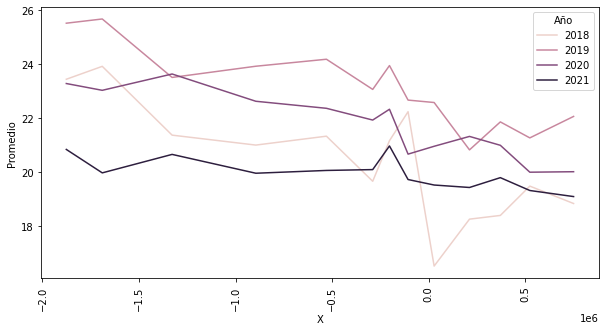

In [24]:
plt.figure(figsize=(10,5))
ax=sns.lineplot(
    data= data_plot,
    x='X',
    y='Promedio',
    hue='Año'
)
ax.tick_params(axis='x', rotation=90)



In [25]:
color_anios = ['#CFD8DC','#419D57','#FBC599','#FF3333']

In [26]:
data_plot[data_plot['Año']==2021][['X','Y']]

,X,Y
39,-1.876573e+06,5.881728e+06
40,-1.690337e+06,5.926710e+06
41,-1.328599e+06,5.994204e+06
42,-8.949637e+05,5.961852e+06
43,-5.292458e+05,5.910870e+06
44,-2.894710e+05,5.930850e+06
45,-2.026330e+05,5.972521e+06
46,-1.063443e+05,5.945389e+06
47,2.865130e+04,5.925916e+06
48,2.118474e+05,5.878179e+06


In [27]:
temperaturas = pd.read_csv('../shape_chile/temperatura/mediaxregion.csv', names = [
 'Año',
 'estaciones',
 'promedio_temp'
  ], skiprows=1)

In [28]:
temperaturas = temperaturas.reset_index()
data_plot = data_plot.reset_index()
data_plot = pd.merge(
    left= data_plot,
    right = temperaturas, 
    left_on = 'index',
    right_on = 'index',
    how='left'
)
data_plot = data_plot[['Año_x', 'X', 'Promedio', 'Y', 'promedio_temp']]
data_plot = data_plot.rename(columns={

    'Año_x' : 'Año'
    
})
data_plot = pd.merge(
    left= data_plot,
    right= chile_pol[['nom_reg', 'X', 'codreg']],
    left_on = 'X',
    right_on = 'X'
)
temperaturas_prom = data_plot[['codreg', 'promedio_temp']].groupby(by=['codreg']).agg('mean','promedio_temp').reset_index()
temperaturas_prom = temperaturas_prom.set_index('codreg')
# temperaturas_prom = temperaturas_prom.set_index('codreg')
temperaturas_prom = temperaturas_prom.loc[index_,:].reset_index()

In [29]:
temperaturas_prom

,codreg,promedio_temp
0,15,19.826018
1,1,19.255955
2,2,17.203688
3,3,16.273983
4,4,14.774065
5,5,14.735104
6,13,16.460149
7,6,15.633949
8,7,14.488865
9,8,13.522507


In [30]:
data_plot

,Año,X,Promedio,Y,promedio_temp,nom_reg,codreg
0,2018,-1.876573e+06,23.444603,5.881728e+06,19.722865,Región de Arica y Parinacota,15
1,2019,-1.876573e+06,25.524146,5.881728e+06,19.498082,Región de Arica y Parinacota,15
2,2020,-1.876573e+06,23.285820,5.881728e+06,19.817930,Región de Arica y Parinacota,15
3,2021,-1.876573e+06,20.840833,5.881728e+06,20.265193,Región de Arica y Parinacota,15
4,2018,-1.690337e+06,23.923333,5.926710e+06,18.973699,Región de Tarapacá,1
5,2019,-1.690337e+06,25.680573,5.926710e+06,18.983288,Región de Tarapacá,1
6,2020,-1.690337e+06,23.034352,5.926710e+06,19.238934,Región de Tarapacá,1
7,2021,-1.690337e+06,19.971640,5.926710e+06,19.827901,Región de Tarapacá,1
8,2018,-1.328599e+06,21.371263,5.994204e+06,16.858767,Región de Antofagasta,2
9,2019,-1.328599e+06,23.512016,5.994204e+06,17.022055,Región de Antofagasta,2


In [31]:
## calculo de los promedios de vitamina D
vitamina_d_promedio_reg = data_plot[['codreg','Promedio']].groupby(by='codreg').agg('mean','Promedio').to_dict()
chile_pol['promedio_vitamina_d'] = chile_pol.codreg.map(lambda x: vitamina_d_promedio_reg['Promedio'].get(x))


In [32]:
def clasificacion(x):
    val=''
    if (x > 0 and x < 19.95): val='#ffffd4'
    elif (x>=19.95 and x< 20.26): val = '#fed98e' 
    elif (x>=20.26 and x<21.32): val = '#fe9929' 
    elif (x>=21.32 and x<22.29): val = '#d95f0e'
    elif (x>=22.29 and x<=24): val = '#993404'
    return val
chile_pol['categorias']= chile_pol.promedio_vitamina_d.map(lambda x: clasificacion(x))

In [33]:
# chile_pol.loc[chile_pol['codreg']==16, 'categorias'] ='#ffffd4'
chile_pol.loc[chile_pol['codreg']==12, 'categorias'] ='#EEEEEE'
chile_pol.loc[chile_pol['codreg']==11, 'categorias'] ='#EEEEEE'


# df.loc[df["Price"] < 150, "Price_Category"] = "Under 150"

In [95]:
romanos_reg = {
    8:'VIII',
    1: 'I',
    2: 'II',
    3: 'III',
    4: 'IV',
    5: 'V',
    6: 'VI',
    7: 'VII',
    9: 'XIV',
    10: 'X',
    11: 'XI',
    12: 'XII',
    13: 'XIII',
    14: 'XIV',
    15: 'XV'
}

data_plot['romanos'] = data_plot.codreg.map(lambda x: romanos_reg.get(x))

/home/fguzman/miniconda3/envs/mdd/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


None


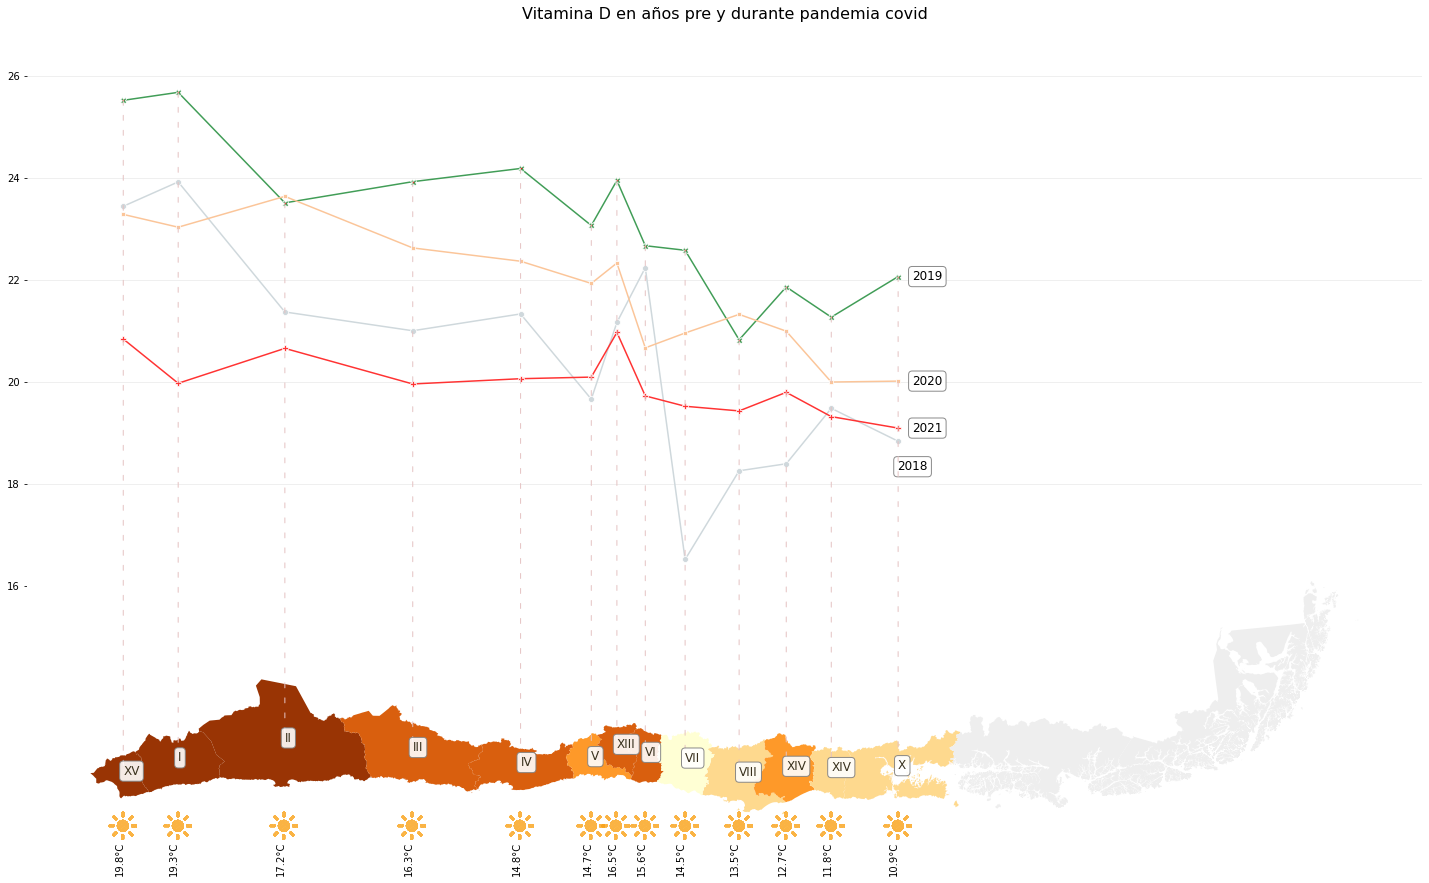

In [116]:
from matplotlib.patches import ConnectionPatch
from matplotlib.text import OffsetFrom
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as image
image_ = image.imread('../shape_chile/sol.png')
imagebox = OffsetImage(image_, zoom = 0.05)

fig, ax = plt.subplots(2,1, figsize=(25,18), sharex='all', gridspec_kw={'hspace': -.4})

ax[0]=sns.lineplot(
    data= data_plot,
    x='X',
    y='Promedio',
    hue='Año',
    ax=ax[0],
    markers=True,
    dashes=False,
    style='Año',
    palette=color_anios,
    legend=False,

    
)
ax[0].set_title("Vitamina D en años pre y durante pandemia covid", fontsize=16)
ax[0].spines['left'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set(ylabel=None)
ax[0].set(xlabel=None)
# x_min, x_max = ax[0].get_xlim()
# ax[0].set_xlim(x_min,x_max+4)




# chile_pol[~chile_pol['codreg'].isin([12,11])].plot(column='MacroZona', 
chile_pol.plot(
    column='promedio_vitamina_d', 
    #categorical=True,
    ax=ax[1],
    # color=chile_pol[~chile_pol['codreg'].isin([12,11])]['categorias'],    
    color=chile_pol['categorias'],    
    # column='promedio_vitamina_d',
    # scheme = 'Fisher_Jenks',
    # k=5,
     # scheme='Fisher_Jenks',
    # cmap='Oranges_r',
    legend=True
   

)



ax[0].set_ylim(15,27)
y_limin,ylimax= ax[1].get_ylim()
# ax[1].set_ylim(y_limin-1,ylimax)

label_anios = data_plot.loc[data_plot.codreg==10,['Año','codreg','Promedio','X','Y']].reset_index()
for i in range(len(label_anios)):
    # print((label_anios.loc[i,'X'],label_anios.loc[i,'Promedio']))
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
   
    if label_anios.loc[i,'Año']==2018:
        ax[0].text(label_anios.loc[i,'X']+49000,label_anios.loc[i,'Promedio']-.5, str(label_anios.loc[i,'Año']), ha="center", va="center", size=12,
        bbox=bbox_props)
    else:
        ax[0].text(label_anios.loc[i,'X']+99000,label_anios.loc[i,'Promedio'], str(label_anios.loc[i,'Año']), ha="center", va="center", size=12,
        bbox=bbox_props)

anio_ = 2019
for xpy in zip(data_plot[data_plot['Año']==anio_]['X'],data_plot[data_plot['Año']==anio_]['Promedio'],data_plot[data_plot['Año']==anio_]['Y'],temperaturas_prom['promedio_temp'],data_plot[data_plot['Año']==anio_]['romanos']):
    # print(xpy[0], xpy[0]-1000)
    ax[0].plot(xpy[0],xpy[1],'ro',markersize=.5)   
    # ax[1].plot(xpy[0],xpy[2],'ro',markersize=8)   
    ax[1].text(xpy[0],xpy[2],s=xpy[4], size=12, color='#39311d', bbox=bbox_props)#, fontweight='bold', )
    ax[1].text((xpy[0]-29999),5545389.992777139,s=f'{xpy[3]:.1f}°C', rotation=90)
    #ax[1].text((xpy[0]-29999),6632454.265839104,s=f'{xpy[3]:.1f}°C', rotation=45)
    ab = AnnotationBbox(imagebox, (xpy[0], 5706728.349250345), frameon = False)
    ax[1].add_artist(ab)
    # print(xpy[2]-399999)
    # ax[1].text(xpy[0],xpy[2]-299999, s='AAAAA')
    
    con = ConnectionPatch(xyA=(xpy[0],xpy[1]), xyB=(xpy[0],xpy[2]), coordsA="data", coordsB="data",
          axesA=ax[0], axesB=ax[1], color="#E5C3C3", linestyle=(0, (5, 10)))
    ax[1].add_artist(con)  
    # print(i)


# ax[0].set(xlabel=)
# ax[0].get_xaxis().set_visible(True)
ax[1].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)

ax[0].get_xaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

# ax[1].get_yaxis().set_visible(True)
# ax[1].axis('off')
# ax[0].axis('on')sol

ax[0].grid(axis='y', color='#ECECEC')

leg = ax[1].get_legend()
print(leg)
# leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))
# ax.set_axis_off()
# plt.tight_layout()
plt.show()

# print(y_limin-1)